In [13]:
library(ggplot2)
library(readr)
library(caret)
library(dplyr)
library(tidyr)
library(tidyverse)
library(caret)
library(DataExplorer)
library(data.table)
library(randomForest)
library(mlr)
library(rpart)
library(rpart.plot)
library(caTools)
library(h2o)
library(reshape2)
library(plotly)
library(grid)
library(gridExtra)

In [2]:
setcol <- c("age","workclass","fnlwgt","education","education-num","marital-status",
            "occupation","relationship","race","sex","capital-gain","capital-loss",
            "hours-per-week","native-country","target")
#load data
adult <- read.table("~/Desktop/Predict-Income-using-US-Census-Data/adult.data.txt",header = F,
                    sep = ",",col.names = setcol,na.strings = c(" ?"),stringsAsFactors = F)
head(adult)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
dim(adult)

[1] 32561    15

In [4]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : chr  " State-gov" " Self-emp-not-inc" " Private" " Private" ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : chr  " Bachelors" " Bachelors" " HS-grad" " 11th" ...
 $ education.num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital.status: chr  " Never-married" " Married-civ-spouse" " Divorced" " Married-civ-spouse" ...
 $ occupation    : chr  " Adm-clerical" " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" ...
 $ relationship  : chr  " Not-in-family" " Husband" " Not-in-family" " Husband" ...
 $ race          : chr  " White" " White" " White" " Black" ...
 $ sex           : chr  " Male" " Male" " Male" " Male" ...
 $ capital.gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week: int  40 13 40 40 40 40 16 45 50 40 ...
 $ native.countr

In [5]:
summary(adult)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education.num   marital.status      occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [6]:
colSums(sapply(adult,is.na))
#is.na(adult)

age      workclass         fnlwgt      education  education.num 
             0           1836              0              0              0 
marital.status     occupation   relationship           race            sex 
             0           1843              0              0              0 
  capital.gain   capital.loss hours.per.week native.country         target 
             0              0              0            583              0

In [7]:
# % of Missing Values
sum(is.na(adult)) / (nrow(adult) *ncol(adult))


[1] 0.008726186

In [8]:
# Check for duplicated rows.

cat("The number of duplicated rows are", nrow(adult) - nrow(unique(adult)))

The number of duplicated rows are 24

## Visualization

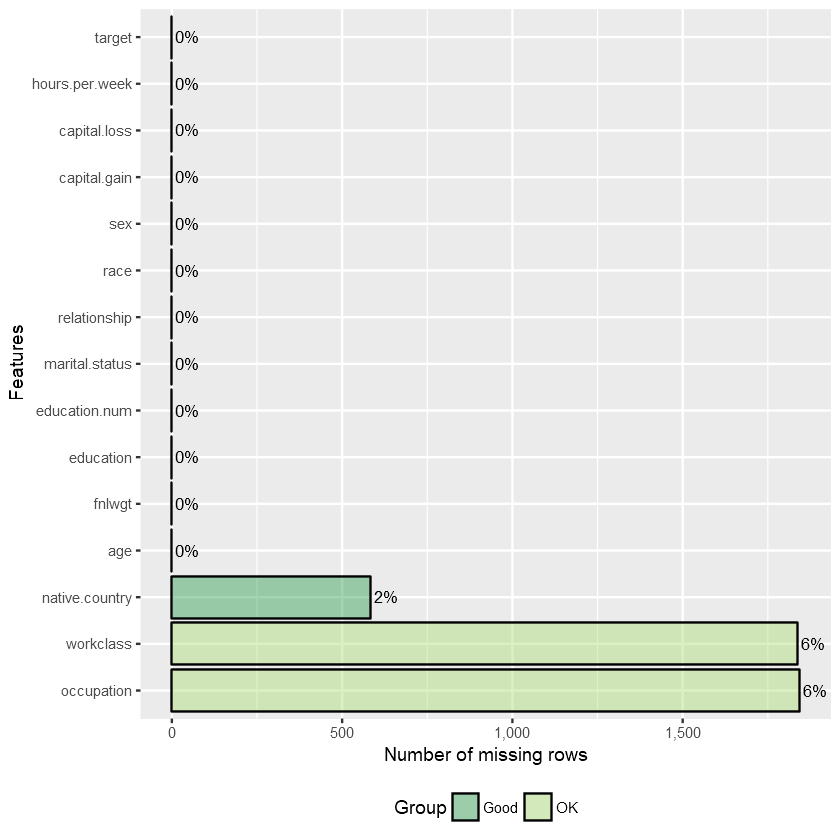

In [12]:
plot_missing(adult)

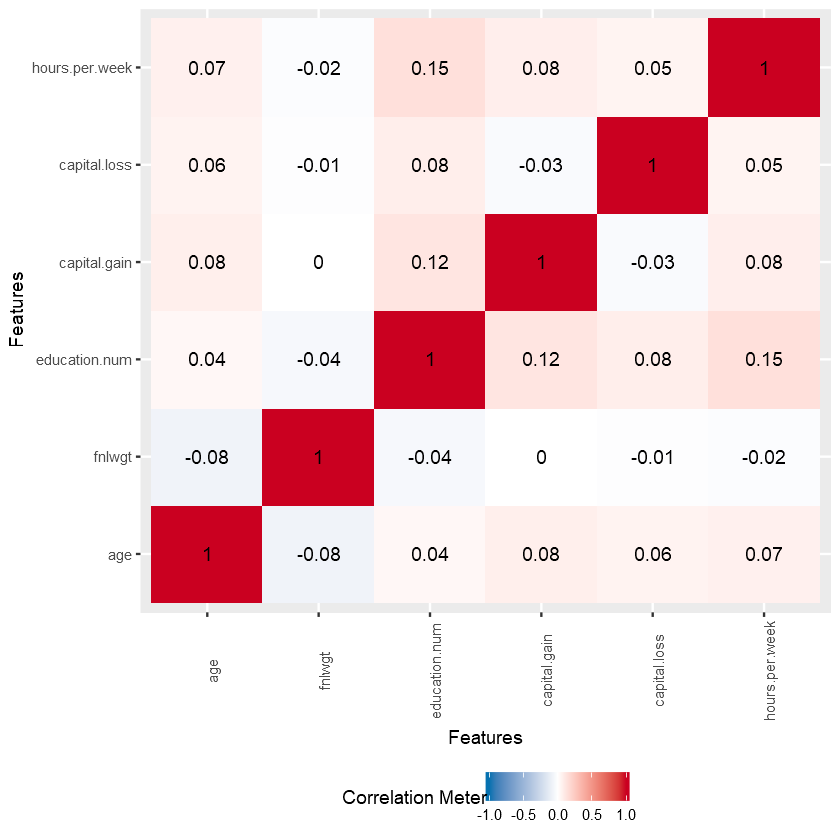

In [17]:
plot_correlation(adult, type = 'continuous','Review.Date')

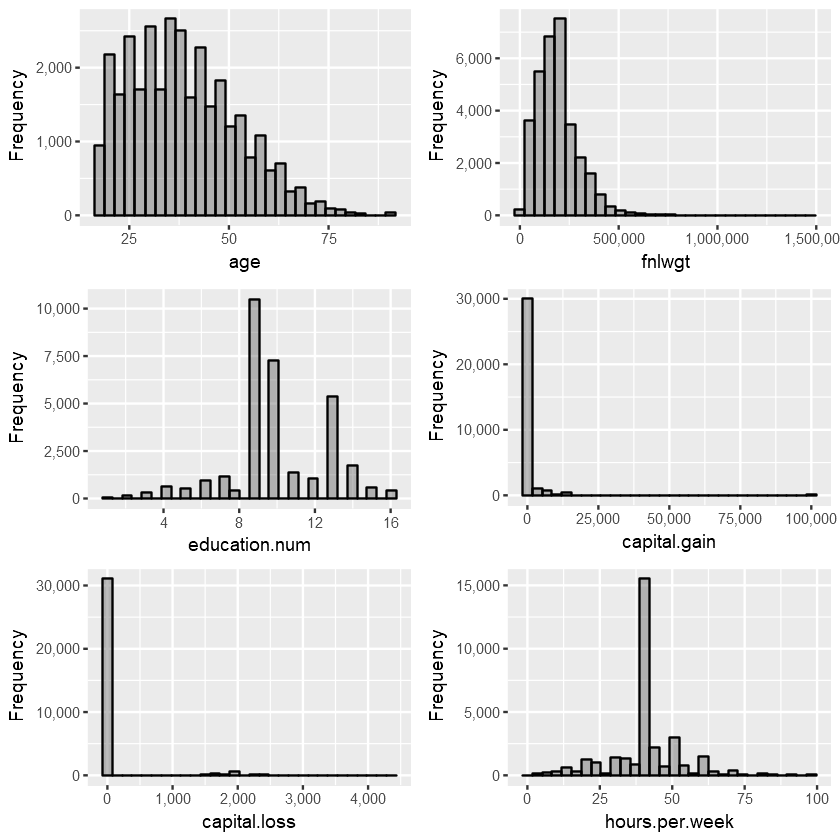

In [18]:
plot_histogram(adult)

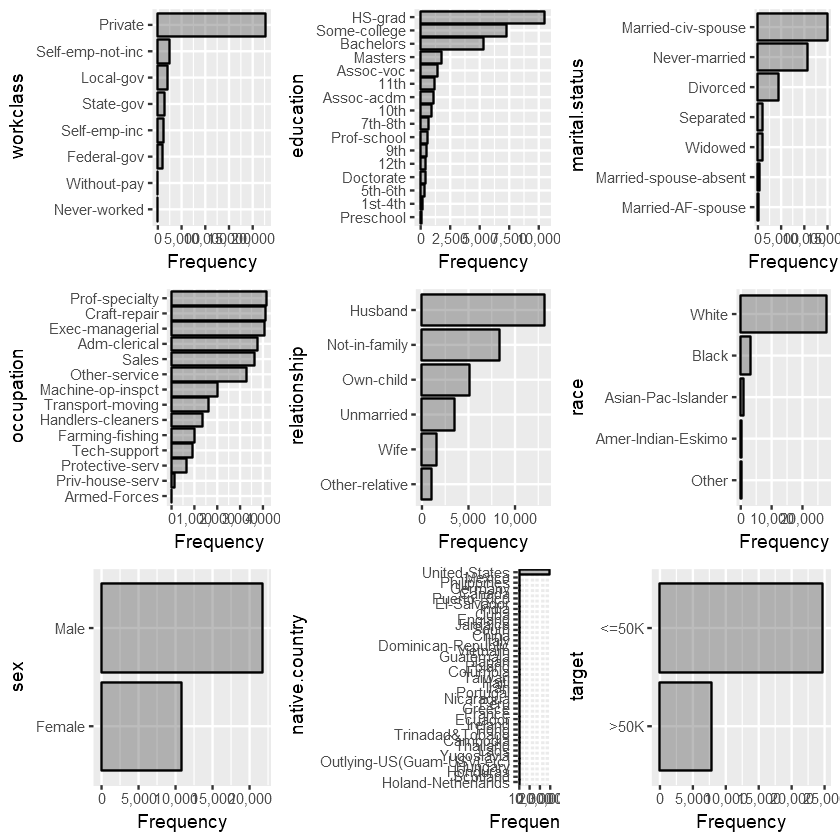

In [23]:
plot_bar(adult)

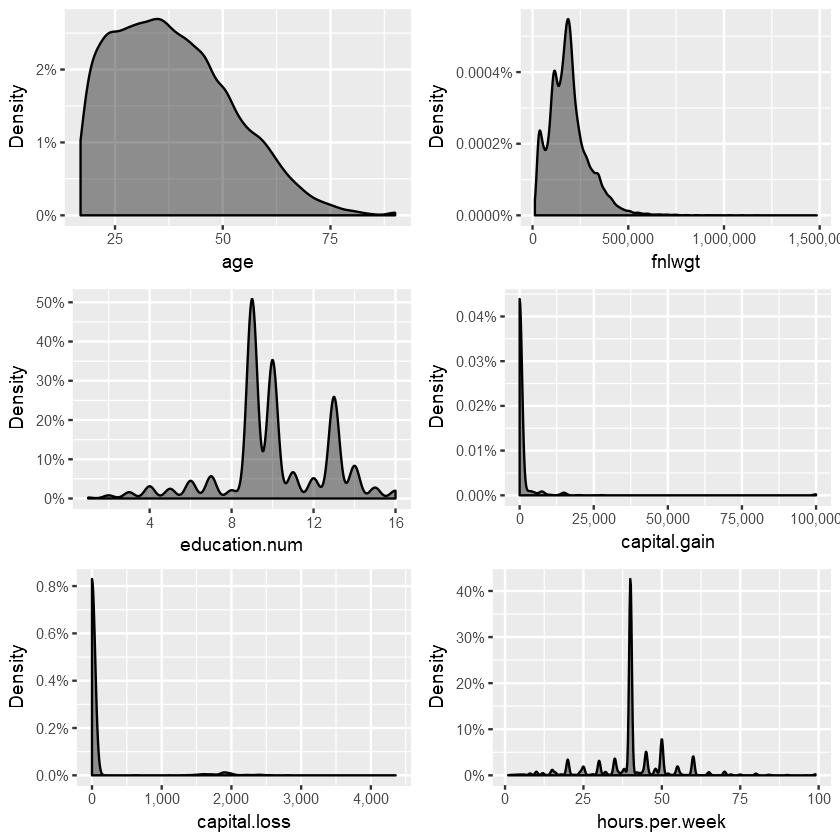

In [24]:
plot_density(adult)

Contineous Features

Warning message:
"Removed 8117 rows containing non-finite values (stat_bin)."

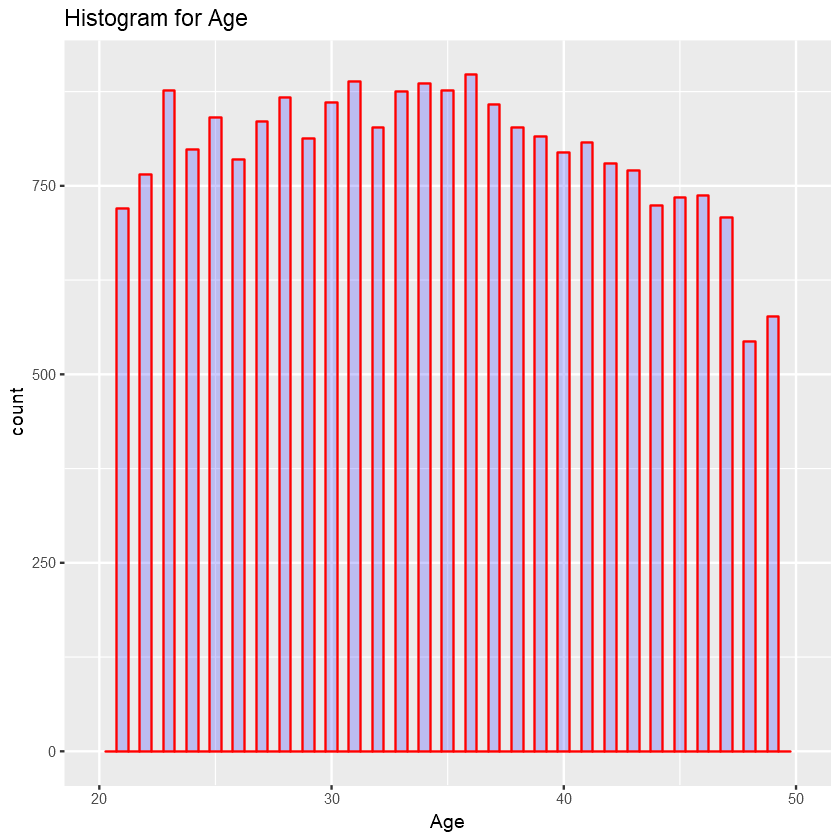

In [38]:
qplot(adult$age,
      geom="histogram",
      binwidth = 0.5,  
      main = "Histogram for Age", 
      xlab = "Age",  
      fill=I("blue"), 
      col=I("red"), 
      alpha=I(.2),
      xlim=c(20,50))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


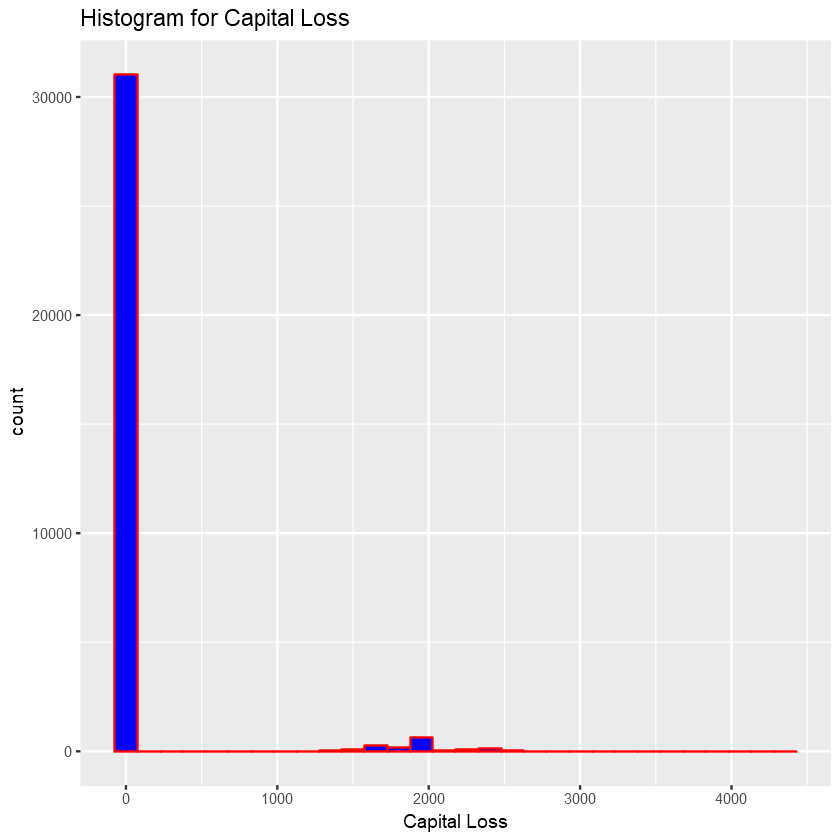

In [18]:
loss_plot <- qplot(adult$capital.loss,
      geom="histogram",  
      main = "Histogram for Capital Loss", 
      xlab = "Capital Loss",  
      fill=I("blue"), 
      col=I("red"))

loss_plot
#grid.arrange(loss_plot, gain_plot, ncol = 2, main = "Histogram for Capital Loss and Captial Gain")

#qplot(CapitalLoss, data=df, geom="histogram")+theme_bw()+ggtitle('Histogram of Capital Loss')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


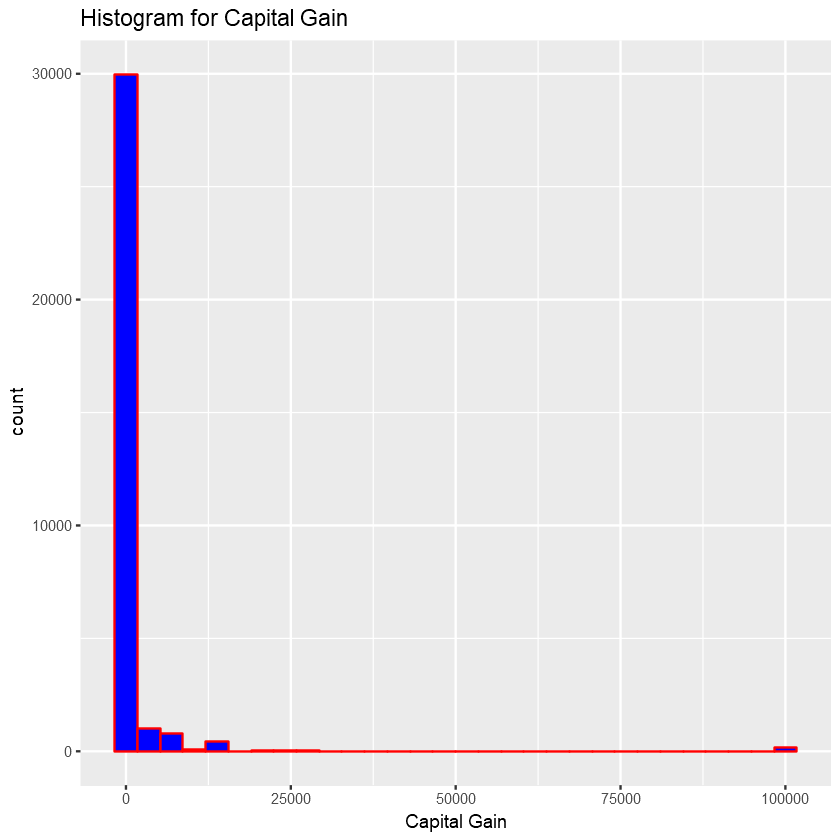

In [17]:
gain_plot <- qplot(adult$capital.gain,
      geom="histogram",  
      main = "Histogram for Capital Gain", 
      xlab = "Capital Gain",
      fill=I("blue"), 
      col=I("red"))
gain_plot

From the two plots we conclude that the capital loss and the capital gain **may not be useful for classification** as they are quite skewed and mostly concentrated at zero value

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


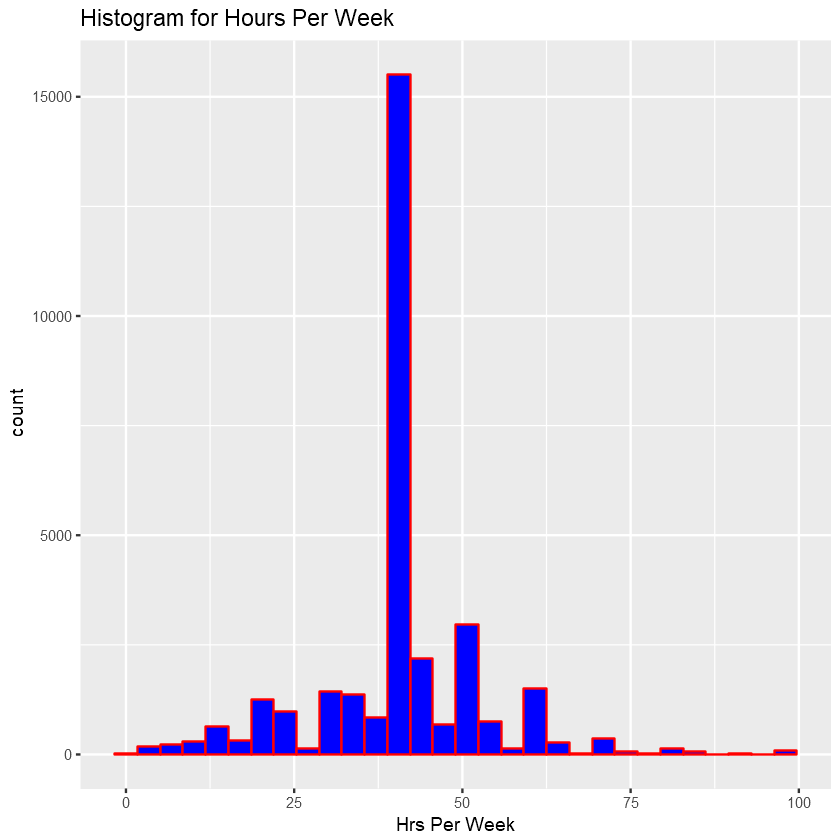

In [8]:
qplot(adult$hours.per.week,
      geom="histogram",  
      main = "Histogram for Hours Per Week", 
      xlab = "Hrs Per Week",  
      fill=I("blue"), 
      col=I("red"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


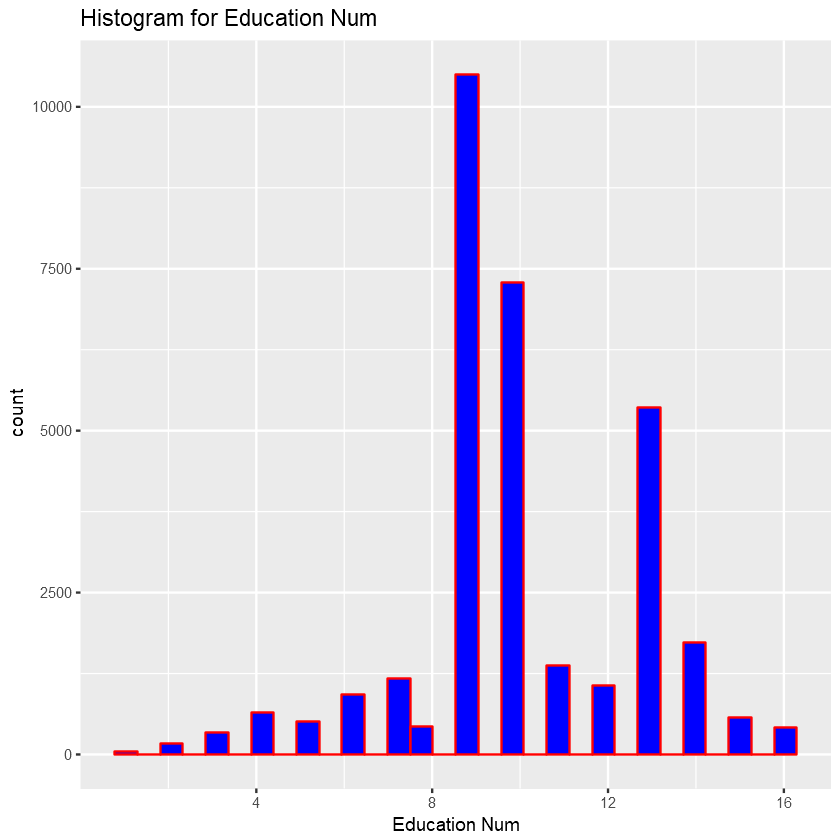

In [19]:
qplot(adult$education.num,
      geom="histogram",  
      main = "Histogram for Education Num", 
      xlab = "Education Num",  
      fill=I("blue"), 
      col=I("red"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


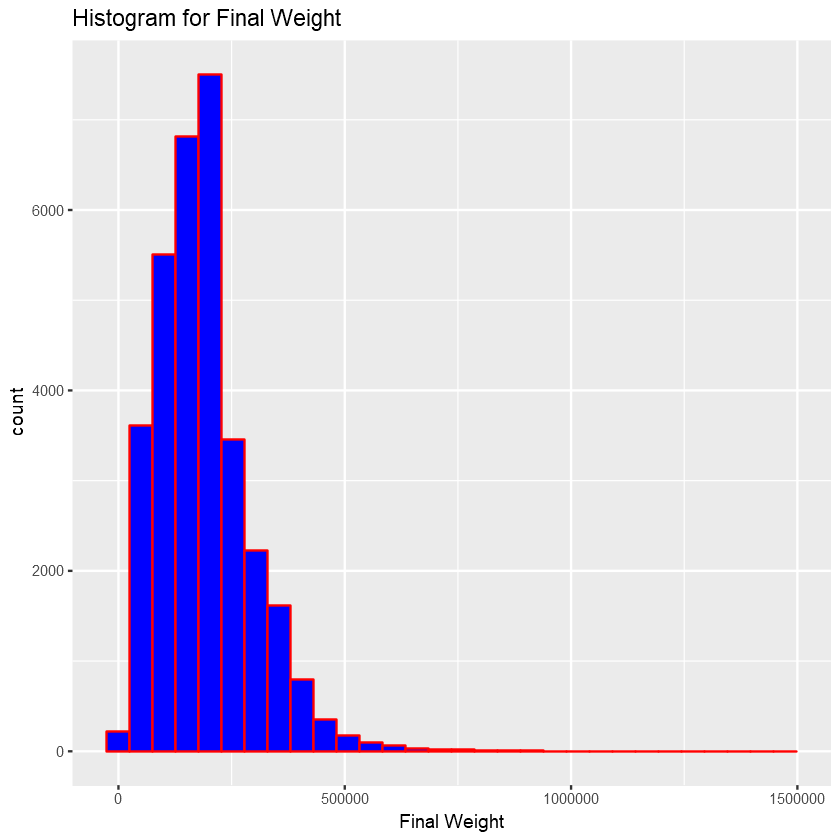

In [21]:
qplot(adult$fnlwgt,
      geom="histogram",  
      main = "Histogram for Final Weight", 
      xlab = "Final Weight",  
      fill=I("blue"), 
      col=I("red"))

### Categorical Features

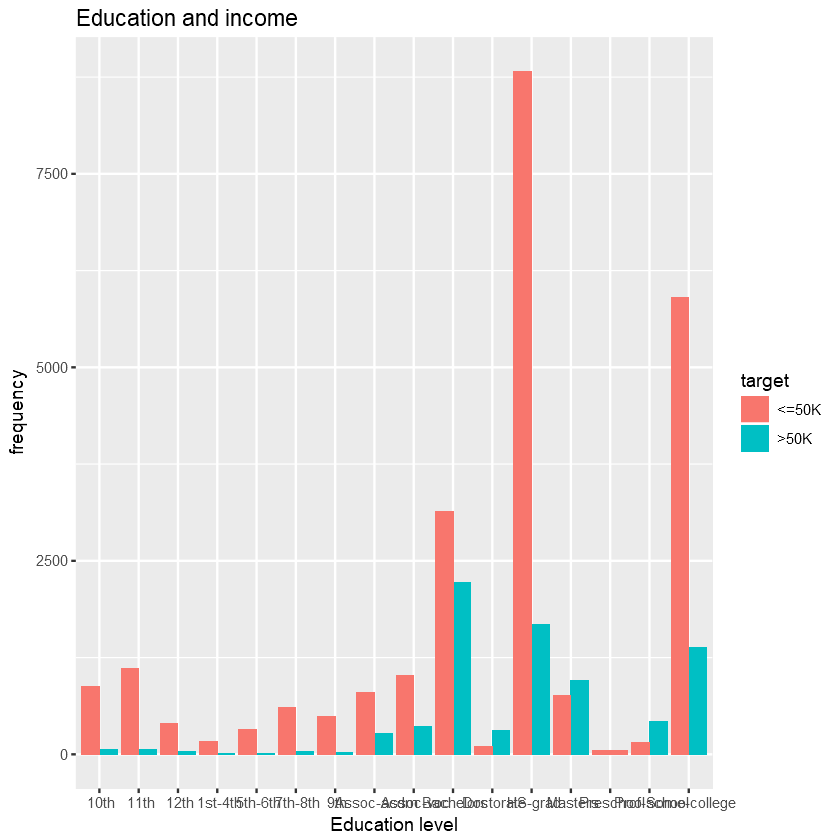

In [22]:
ggplot(adult, aes(education, fill = target) ) +
  geom_bar(position = "dodge")+
  ggtitle('Education and income')+
  xlab('Education level') +
  ylab('frequency')

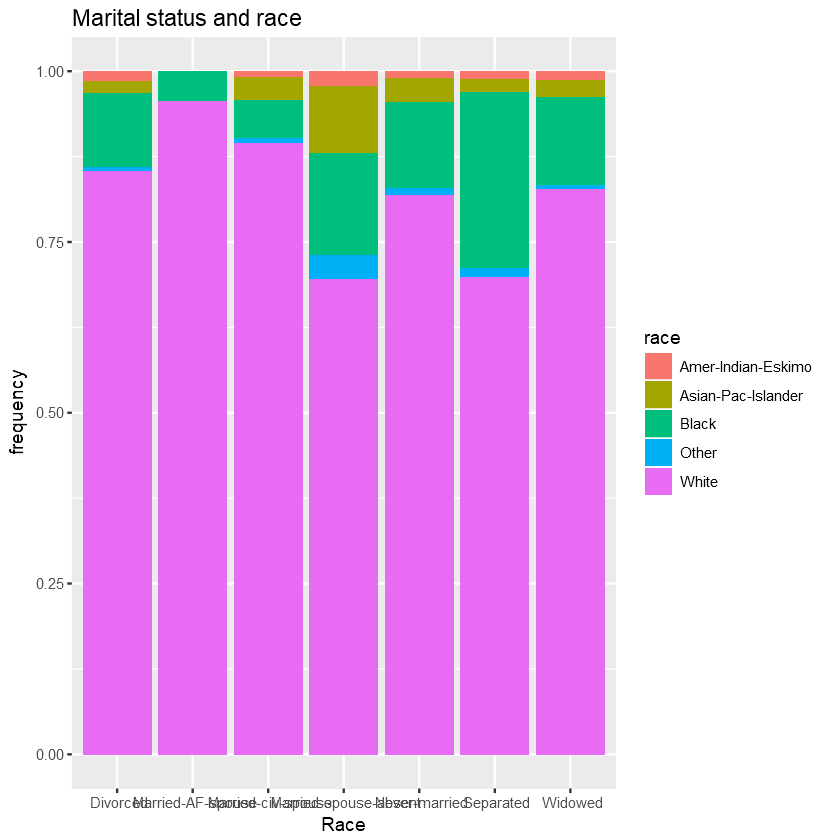

In [23]:
ggplot(adult, aes(marital.status, fill = race) ) +
  geom_bar(position = "fill")+
  ggtitle('Marital status and race')+
  xlab('Race') +
  ylab('frequency')
